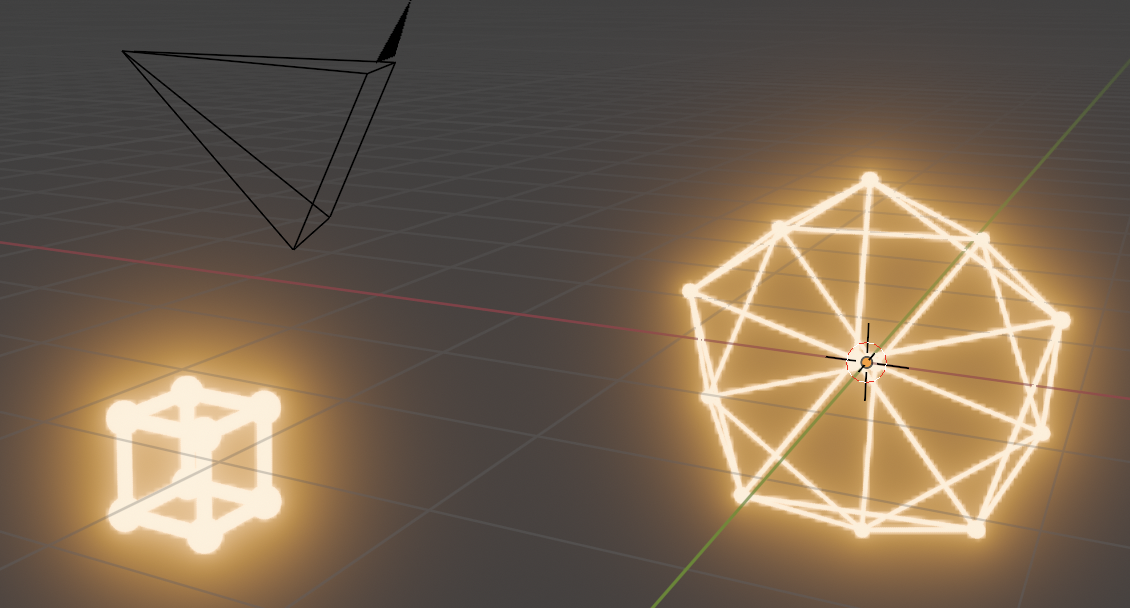

In [26]:
import bpy
from IPython.display import display, Image
import bmesh

def fresh_scene(keep_cube=False):
    # Deselect all objects
    bpy.ops.object.select_all(action='DESELECT')
    
    # Select all objects except cameras and optionally the default cube
    for obj in bpy.context.scene.objects:
        if obj.type == 'CAMERA':
            obj.select_set(False)
        elif obj.name == 'Cube' and keep_cube:
            obj.select_set(False)
        else:
            obj.select_set(True)
    
    bpy.ops.object.delete()
    
    # Add light
    bpy.ops.object.light_add(type='SUN')
    sun = bpy.context.object

    sun.location = (0, 0, 0)
    from math import radians
    sun.rotation_euler = (radians(204), radians(-133), radians(-67))
    sun.data.energy = 5  


def render_result():
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath="img.png")
    display(Image(filename="img.png", width=300))


In [27]:
blend_file_path = "n3c_create_a_simple_network.blend"
bpy.ops.wm.open_mainfile(filepath=blend_file_path)
bpy.context.scene.render.resolution_x = 700
bpy.context.scene.render.resolution_y = 700

In [28]:
def create_graph(name, node_positions, edges):
    # Create a new mesh and object
    mesh = bpy.data.meshes.new("GraphMesh")
    graph = bpy.data.objects.new(name, mesh)
    bpy.context.collection.objects.link(graph)

    # Create a BMesh to add vertices and edges
    bm = bmesh.new()
    bm_verts = []
    for key, co in sorted(node_positions.items()):
        bm_verts.append(bm.verts.new(co))

    # Add edges
    for edge in edges:
        v1, v2 = edge
        bm.edges.new((bm_verts[v1], bm_verts[v2]))

    # Write the BMesh to the mesh
    bm.to_mesh(mesh)

    return graph

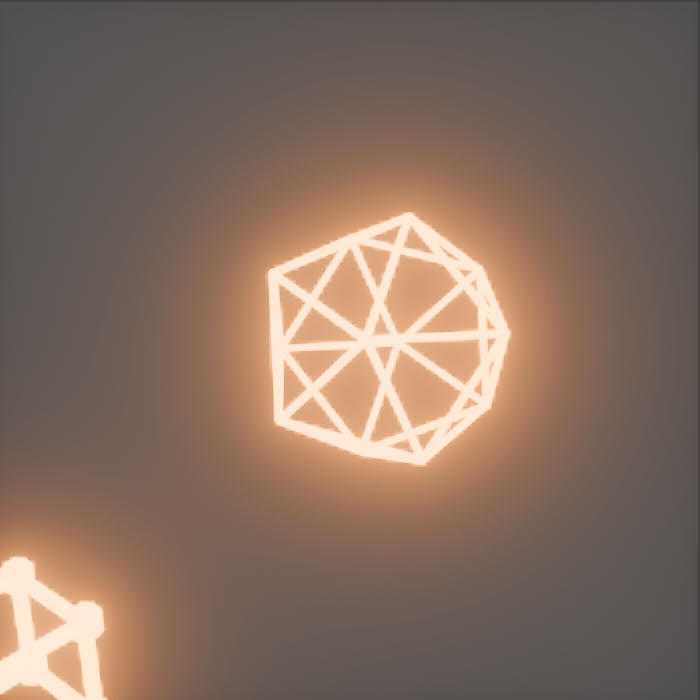

In [29]:
fresh_scene(keep_cube=True)


# Define the node positions and edges
node_positions = {
    0: [-0.81, -0.48, 0.38],
    1: [0.13, -0.97, 0.27],
    2: [0.91, -0.24, 0.40],
    3: [0.81, 0.48, -0.38],
    4: [-0.02, 0.20, -1.00],
    5: [-0.44, -0.70, -0.59],
    7: [-0.62, 0.55, 0.58],
    8: [0.01, -0.20, 1.00],
    9: [0.44, 0.70, 0.59],
    10: [-0.13, 0.97, -0.27],
    11: [-0.91, 0.24, -0.40],
    6: [0.63, -0.55, -0.59],
}

edges = [(0, 1), (0, 5), (0, 7), (0, 8), (0, 11), (1, 2), (1, 5), (1, 6), 
         (1, 8), (2, 3), (2, 6), (2, 8), (2, 9), (3, 4), (3, 6), (3, 9), (3, 10), 
         (4, 5), (4, 6), (4, 10), (4, 11), (5, 6), (5, 11), (7, 8), (7, 9), (7, 10), (7, 11), 
         (8, 9), (9, 10), (10, 11)]


graph = create_graph(name="Simple Graph", node_positions=node_positions, edges=edges)


modifier = graph.modifiers.new(name="GeometryNodes", type='NODES')
modifier.node_group = bpy.data.node_groups["default_node"]
modifier["Socket_2"] = 3
modifier["Socket_3"] = 3
graph.data.update()


render_result()

In [30]:
%pip install networkx


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: /Applications/Blender.app/Contents/Resources/4.2/python/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
%pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: /Applications/Blender.app/Contents/Resources/4.2/python/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
import networkx

In [33]:
import networkx as nx
G = nx.balanced_tree(4, 5)

In [34]:
node_positions = nx.spring_layout(G, dim=3, scale=1.9)
edges = list(G.edges)

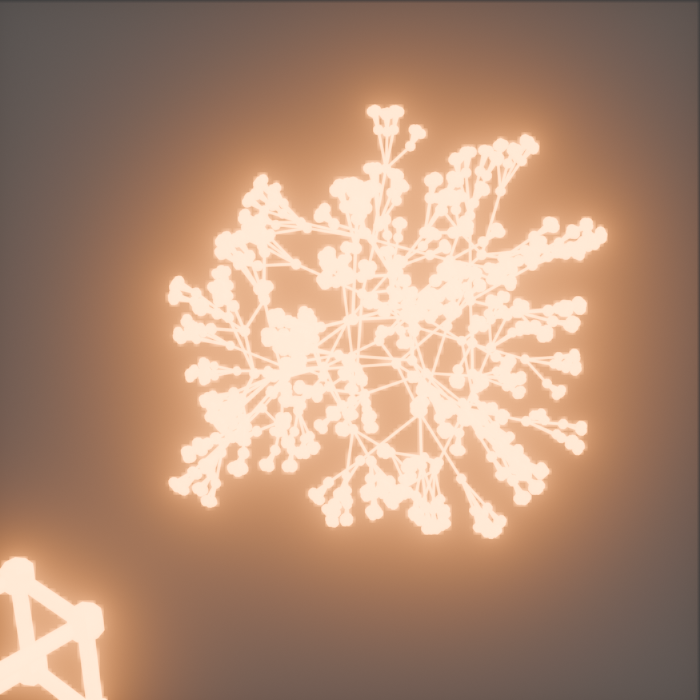

In [35]:
fresh_scene(keep_cube=True)
graph = create_graph(name="Network1", node_positions=node_positions, edges=edges)
modifier = graph.modifiers.new(name="GeometryNodes", type='NODES')
modifier.node_group = bpy.data.node_groups["default_node"]
modifier["Socket_2"] = 1
modifier["Socket_3"] = 4
graph.data.update()
render_result()

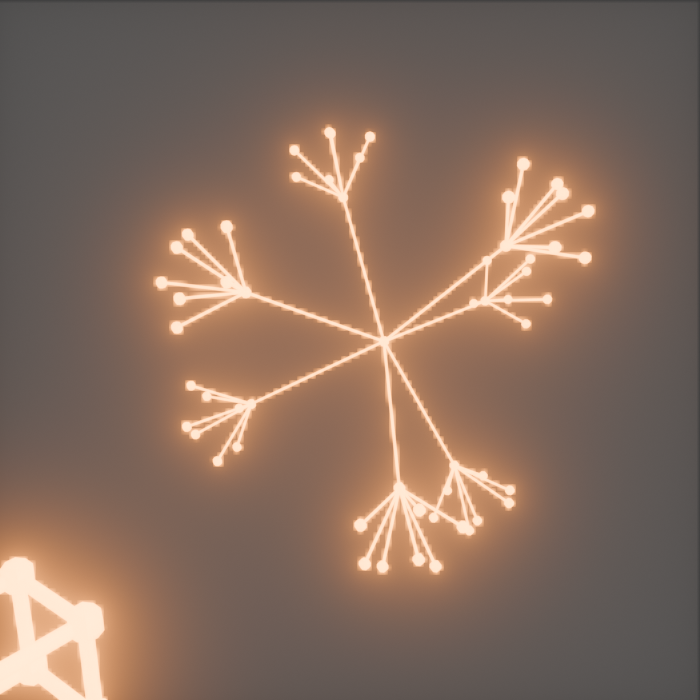

In [36]:
import networkx as nx
G = nx.balanced_tree(7, 2)

node_positions = nx.spring_layout(G, dim=3, scale=1.9)
edges = list(G.edges)

fresh_scene(keep_cube=True)
graph = create_graph(name="Network1", node_positions=node_positions, edges=edges)
modifier = graph.modifiers.new(name="GeometryNodes", type='NODES')
modifier.node_group = bpy.data.node_groups["default_node"]
modifier["Socket_2"] = 1
modifier["Socket_3"] = 4
graph.data.update()
render_result()